### 1. Import Required Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Load the Dataset and Basic Dataset Overview

In [46]:
df = pd.read_csv("MasterClass-FinTech01-Data.csv")

print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)

Shape: (1500, 15)

Data types:
monthly_income           float64
avg_monthly_spend        float64
credit_limit             float64
num_transactions           int64
account_tenure_months      int64
cash_withdraw_ratio      float64
late_payment_count         int64
age                        int64
region_risk_score        float64
marketing_score          float64
app_login_count            int64
employment_type           object
debt_to_income           float64
payment_delay_ratio      float64
repayment_issue            int64
dtype: object


### 4. Missing Value Analysis

In [47]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
monthly_income           111
avg_monthly_spend          0
credit_limit               0
num_transactions           0
account_tenure_months      0
cash_withdraw_ratio        0
late_payment_count         0
age                        0
region_risk_score          0
marketing_score            0
app_login_count            0
employment_type          109
debt_to_income             0
payment_delay_ratio        0
repayment_issue            0
dtype: int64


### 5. Target Variable Distribution (Class Imbalance)

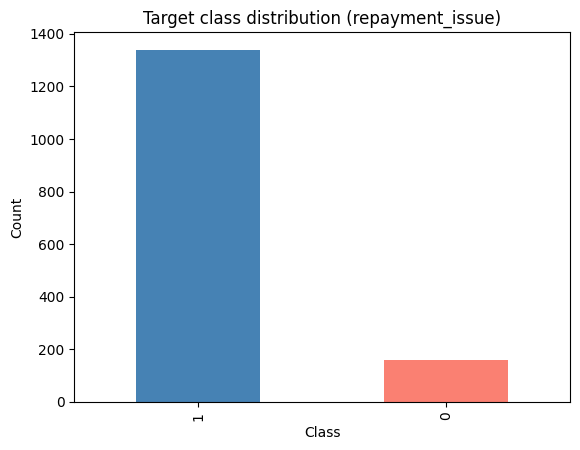

In [48]:
plt.figure()
df["repayment_issue"].value_counts().plot(
    kind="bar",
    color=["steelblue", "salmon"]
)
plt.title("Target class distribution (repayment_issue)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


### 6. Distribution Analysis of Numeric Features

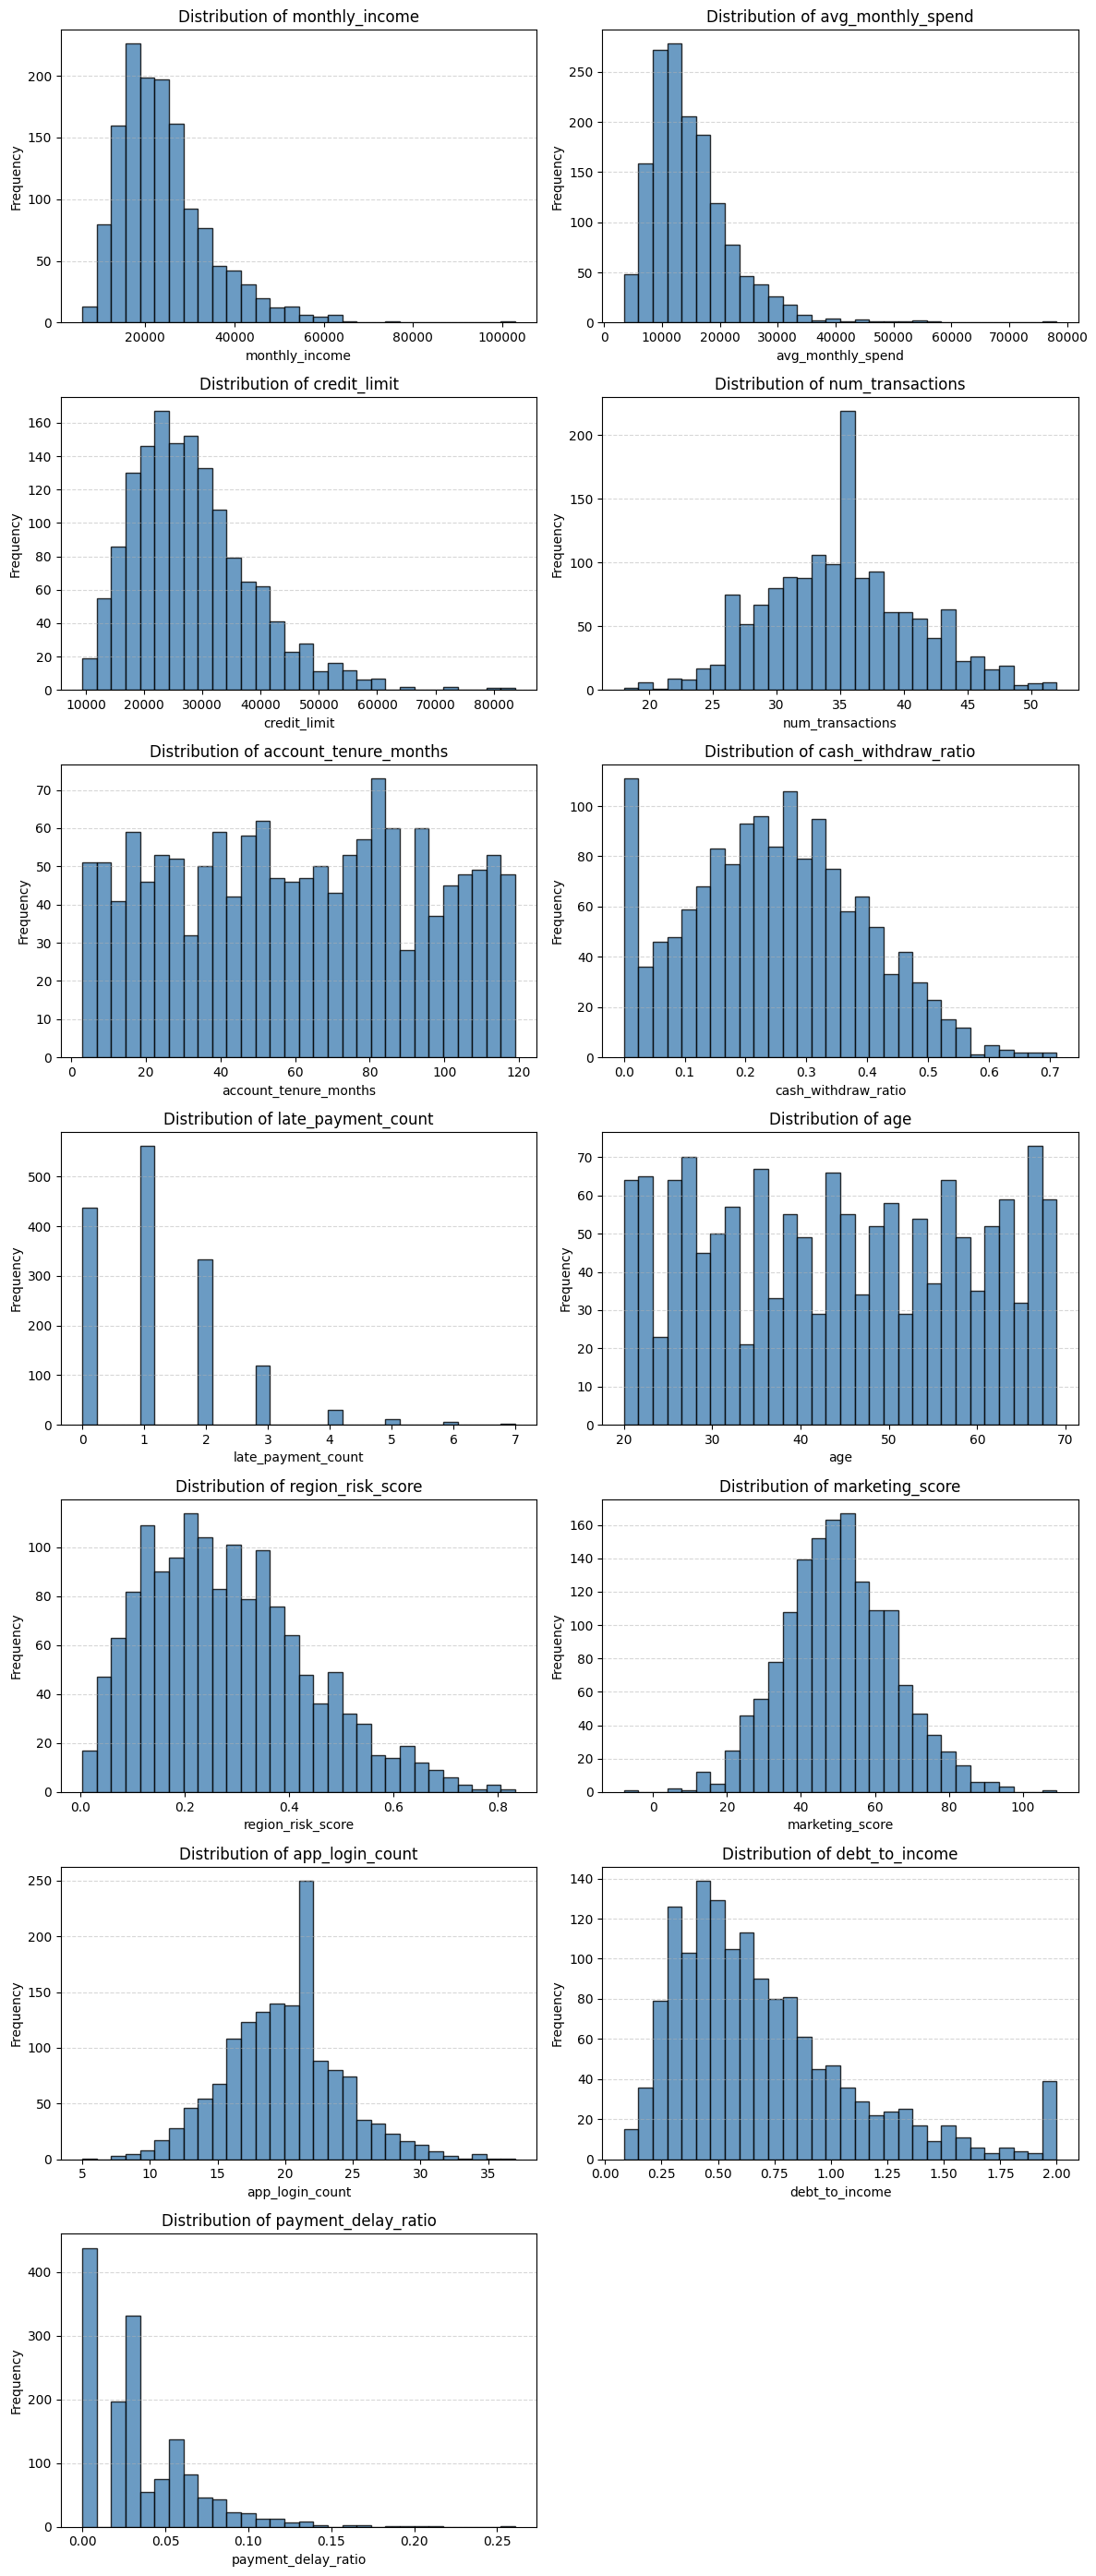

In [49]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col != "repayment_issue"]

n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(
        df[col],
        bins=30,
        color="steelblue",
        edgecolor="black",
        alpha=0.8
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 7. Correlation with Target Variable (repayment_issue)

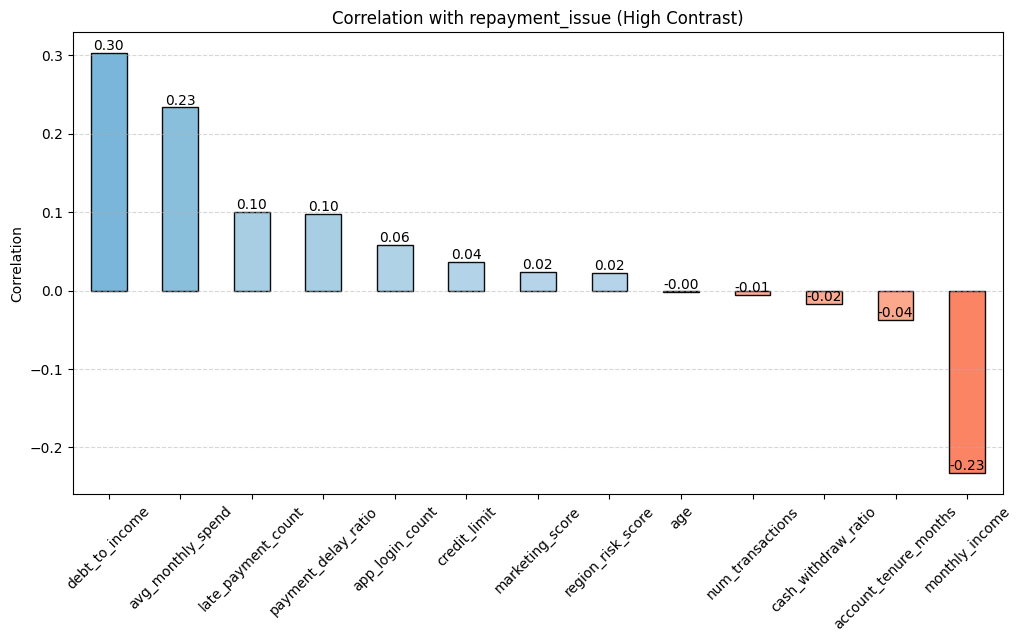

In [50]:
df["repayment_issue"] = df["repayment_issue"].astype(int)

numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col != "repayment_issue"]

corr = df[numeric_cols + ["repayment_issue"]].corr()["repayment_issue"].sort_values(ascending=False)
corr_drop = corr.drop("repayment_issue")

colors = []
for val in corr_drop:
    intensity = 0.3 + 0.6 * abs(val)
    if val >= 0:
        colors.append(plt.cm.Blues(intensity))
    else:
        colors.append(plt.cm.Reds(intensity))

plt.figure(figsize=(12,6))
bars = corr_drop.plot(
    kind="bar",
    color=colors,
    edgecolor="black",
    alpha=0.95
)

plt.title("Correlation with repayment_issue (High Contrast)")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar, val in zip(bars.patches, corr_drop):
    bars.annotate(f"{val:.2f}", 
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10)

plt.show()